<a href="https://colab.research.google.com/github/mpfoster/Biochem6765/blob/master/example_simple_stats_6765.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Limits of statistical metrics
We will examine four distinct datasets using common statistical metrics, and examine how well those metrics can distinguish the data, and how representative of the data are the statistics.

For each dataset we will compute these metrics:
* _mean_ of $x$ and $y$ values:

$$\bar{x} = \frac{1}{N}\sum_{i=1}^N x_i$$

* _sample variance_ of $x$ and $y$:

$$s = \frac{1}{N-1}\sum_i (x_i-\bar{x})^2$$

* _sample standard deviation_ of $x$ and $y$:

$$s = \sqrt{\frac{1}{N-1}\sum_i (x_i-\bar{x})^2}$$

* correlation coefficient

$$\rho = \frac{\bar{xy}-\bar{x}\bar{y}}{\sigma_x\sigma_y}$$
* Linear regression line
$$y = mx+b$$

If you prefer to use another tool to perform this analysis (e.g., MS Excel, Google Sheets), the data file in _cvs_ format, can be downloaded from [this link](https://github.com/mpfoster/Biochem6765/raw/master/data/a-data.csv).

What follow are tips for performing the analysis using Python.

In [ ]:
# we'll use pandas to read data from web and to facilitate analysis
import pandas as pd
df = pd.read_csv('https://github.com/mpfoster/Biochem6765/raw/master/data/a-data.csv')
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


Note that there are 44 rows (starting with the 0th row); that's 11 $xy$ pairs per dataset I-IV. We could split the data into four separate dataframes by issuing commands like:

In [ ]:
df1=df.query("dataset == 'I'")    # all entries with "dataset == 'I'" will be placed in the new df1
df1

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


In [ ]:
df1.describe()  # the command prints out basic statistics on the df

,x,y
count,11.000000,11.000000
mean,9.000000,7.500909
std,3.316625,2.031568
min,4.000000,4.260000
25%,6.500000,6.315000
50%,9.000000,7.580000
75%,11.500000,8.570000
max,14.000000,10.840000


In [ ]:
# df.std() by default computes the sample standard dev, as per ddof=1
# the Variance is the square of the stdev
print('V(x,y) = %.03f, %.03f' % (df1.x.std()**2, df1.y.std()**2))

V(x,y) = 11.000, 4.127


In [ ]:
# covariance matrix for x and y
df1.cov()

,x,y,fit
x,11.000,5.501000,5.501
y,5.501,4.127269,2.751
fit,5.501,2.751000,2.751


In [ ]:
# (Pearson) correlation between x and y
df1.corr()

,x,y
x,1.000000,0.816421
y,0.816421,1.000000


There are many Python tools for linear regression; here's we'll just use the polynomial fit function in numpy (a line is a first-order polynomial). Numpy's `polyfit` function takes as input a paired list of x and y values, and the polynomial order, and returns the coefficients of the polynomial; in this case, the slope and y-intercept:

In [ ]:
import numpy as np
m,b = np.polyfit(df1.x,df1.y,1)
print('slope: %.g, intercept: %.g' % (m,b))
fitline = m*df1.x+b
df1.loc[:,('fit')]= fitline # add a column with the best-vit values

slope: 0.5, intercept: 3


Text(0.5, 1.0, 'slope: 0.5, intercept: 3')

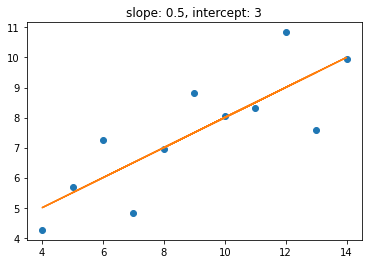

In [ ]:
import matplotlib.pyplot as plt
plt.plot(df1.x, df1.y,'o')
plt.plot(df1.x, df1.fit,'-')
plt.title('slope: %.3g, intercept: %.g' % (m,b))

We can then repeat the above analysis for each of the 4 datasets.

(If interested, the process could be streamlined make use of the Pandas `groupby` function.)